# Mock data

C:\Users\xyz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


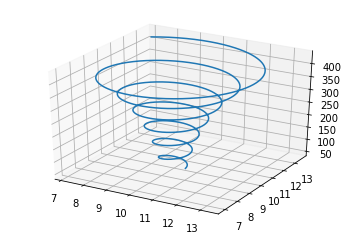

In [46]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from math import exp,sin,cos
from pylab import *
from sklearn.preprocessing import scale

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
a=0.05
b=0.05
# took the liberty of reducing the max value for th 
# as it was giving you values of the order of e42
th=np.linspace(0, 40, 10000)  
x=10*a*exp(b*th)*cos(th) + 10
y=10*a*exp(b*th)*sin(th) + 10
z=10*th + 40  # creating the z array with the same length as th
ax.plot(x, y, z)  # adding z as an argument for the plot
ax.legend()
print(th)
plt.show()

In [47]:
import xlwt
import os
from xlwt import Workbook
#os.remove("ISRO.xls")
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1')
sheet1.write(0, 0, 'X Coordinate') 
sheet1.write(0, 1, 'Y Coordinate') 
sheet1.write(0, 2, 'z Coordinate')
sheet1.write(0, 3, 'Time')
for i in range(1,9990):
    sheet1.write(i, 0, x[i-1]) 
for j in range(1,9990):
    sheet1.write(j,1,y[j-1])
for k in range(1,9990):
    sheet1.write(k,2,z[k-1])
for t in range(1,9990):
    sheet1.write(t,3,t)
    
wb.save('ISRO.xls')

# Reshape data 

In [48]:
x = np.reshape(x,(x.shape[0],1))
y = np.reshape(y,(y.shape[0],1))
z = np.reshape(z,(z.shape[0],1))
th = np.reshape(th,(th.shape[0],1))

# Normalize and Concatenate data

In [49]:
x = scale(x)
y = scale(y)
z = scale(z)
th = scale(th)

In [50]:
x_final = x[0:x.shape[0]-2,:]    #x before  x(t)                                                                      
y_final = y[0:y.shape[0]-2,:]
z_final = z[0:z.shape[0]-2,:]
th_final = th[1:th.shape[0]-1,:]

x_train_final = x[1:x.shape[0]-1,:] #x after; <-- this follows x final x(t+1)
y_train_final = y[1:y.shape[0]-1,:]
z_train_final = z[1:z.shape[0]-1,:]

In [51]:
xy = np.concatenate((x_final, y_final), axis=1)
xyz = np.concatenate((xy, z_final), axis=1)
X = np.concatenate((xyz, th_final), axis=1)

In [52]:
xy_train = np.concatenate((x_train_final, y_train_final), axis=1)
Y = np.concatenate((xy_train, z_train_final), axis=1)

### sanity check

In [53]:
X.shape, Y.shape

((9998, 4), (9998, 3))

# Model architecture

In [54]:
from keras.layers import Dense
from keras.layers import LSTM

from keras.models import Sequential

model = Sequential()

model.add(Dense(16, input_dim = 4, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# Train model

In [60]:
model.fit(X[0:8000],Y[0:8000], epochs=100)

Epoch 1/100
8000/8000 [==============================] - 1s 63us/step - loss: 1.5321e-06 - acc: 0.9998
Epoch 2/100
8000/8000 [==============================] - 1s 63us/step - loss: 1.3512e-06 - acc: 0.9994
Epoch 3/100
8000/8000 [==============================] - 1s 67us/step - loss: 1.3334e-06 - acc: 0.9998
Epoch 4/100
8000/8000 [==============================] - 1s 66us/step - loss: 1.4530e-06 - acc: 0.9996
Epoch 5/100
8000/8000 [==============================] - 0s 59us/step - loss: 1.4451e-06 - acc: 0.9994
Epoch 6/100
8000/8000 [==============================] - 1s 64us/step - loss: 5.1575e-06 - acc: 0.9994
Epoch 7/100
8000/8000 [==============================] - 0s 61us/step - loss: 2.5645e-06 - acc: 0.9989
Epoch 8/100
8000/8000 [==============================] - 1s 69us/step - loss: 2.1172e-06 - acc: 0.9996
Epoch 9/100
8000/8000 [==============================] - 1s 65us/step - loss: 1.4605e-06 - acc: 0.9996
Epoch 10/100
8000/8000 [==============================] - 1s 77us/step - 

In [37]:
th

array([  0.00000000e+00,   4.00040004e-03,   8.00080008e-03, ...,
         3.99919992e+01,   3.99959996e+01,   4.00000000e+01])

In [64]:
predictions = model.predict(X[8001:])
# round predictions
#rounded = [(x[0]) for x in predictions]
#print(rounded)
predictions

array([[ 1.57478929,  0.98995006,  1.03942287],
       [ 1.5704577 ,  0.99641788,  1.03970182],
       [ 1.56609869,  1.00287223,  1.03998029],
       ..., 
       [-1.98424673,  2.03966045,  1.72880042],
       [-1.99362373,  2.0326736 ,  1.72906625],
       [-2.0029726 ,  2.0256505 ,  1.72933269]], dtype=float32)

In [69]:
X[9997]

array([-1.98986941,  2.0339045 ,  1.73118479,  1.7315312 ])

In [72]:
predictions.shape

(1997, 3)

In [74]:
predictions[-1]

array([-2.0029726 ,  2.0256505 ,  1.72933269], dtype=float32)

In [75]:
X[-1]

array([-1.98986941,  2.0339045 ,  1.73118479,  1.7315312 ])

In [2]:
0

0